In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Model- Description

1. Use VGG-16 pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add 2 FC layers and a output layer to classify 2 classes. 
3. Final architecture will be INPUT --> VGG-16 without Top layers(FC) ---> 2 FC layers --> Output Layer
4. Train only FC layers, output layer. Don't train the VGG-16 network. 


In [2]:
#import tensorflow
import tensorflow as tf 

#code to check whether gpu is thier or not
if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
import os
import numpy as np
import pandas as pd
import cv2

In [4]:
# import the libraries as shown below
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
dir_path ="/content/drive/MyDrive/lotus_flower/sample_images_train"

In [6]:
len(os.listdir(dir_path))

6

In [7]:
!pip install split-folders
import splitfolders 
input_folder = "/content/drive/MyDrive/lotus_flower/sample_images_train"
output = "/content/drive/MyDrive/output_flower" 

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1)) 


Copying files: 236 files [02:19,  1.69 files/s]


In [8]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  lotus_images_in_water  category is  39
No of Images in  blooming_lotus_flower  category is  45
No of Images in  two_lotus_flowers_images  category is  41
No of Images in  images_of_lotus_flower_india  category is  30
No of Images in  lotus_flower_plant  category is  39
No of Images in  lotus_images  category is  42


In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/output_flower/train'
valid_path = '/content/drive/MyDrive/output_flower/val'

In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


#[3] is for rgb scale image and [1] is for grayscale image

58900480/58889256 [==============================] - 2s 0us/step


In [11]:
# don't train existing weights
#freezing the weights
for layer in vgg16.layers:
    layer.trainable = False

In [12]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/output_flower/train')

In [13]:
# our layers - you can add more if you want
Dense1 = Dense(500,name="Dense1",activation='relu')(vgg16.output)
Dense2 = Dense(500,name="Dense2",activation='relu')(Dense1)
x=Flatten()(Dense2)
prediction = Dense(6,name="Output", activation='softmax')(x)

In [14]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/output_flower/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 187 images belonging to 6 classes.


In [19]:
valid_set = test_datagen.flow_from_directory('/content/drive/MyDrive/output_flower/val',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 21 images belonging to 6 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/15
6/6 [==============================] - 28s 2s/step - loss: 2.9027 - accuracy: 0.1497 - val_loss: 1.9302 - val_accuracy: 0.1429
Epoch 2/15
6/6 [==============================] - 8s 1s/step - loss: 1.7581 - accuracy: 0.2086 - val_loss: 1.7374 - val_accuracy: 0.3810
Epoch 3/15
6/6 [==============================] - 8s 1s/step - loss: 1.6109 - accuracy: 0.3690 - val_loss: 1.7055 - val_accuracy: 0.2857
Epoch 4/15
6/6 [==============================] - 8s 1s/step - loss: 1.5026 - accuracy: 0.4171 - val_loss: 1.7366 - val_accuracy: 0.2857
Epoch 5/15
6/6 [==============================] - 8s 1s/step - loss: 1.3115 - accuracy: 0.5134 - val_loss: 1.7644 - val_accuracy: 0.2857
Epoch 6/15
6/6 [==============================] - 8s 1s/step - loss: 1.3166 - accuracy: 0.4813 - val_loss: 1.8878 - val_accuracy: 0.2381
Epoch 7/15
6/6 [==============================] - 8s 1s/step - loss: 1.1627 - accuracy: 0.6043 - val_loss: 1.7584 - val_accuracy: 0.2857
Epoch 8/15
6/6 [========================

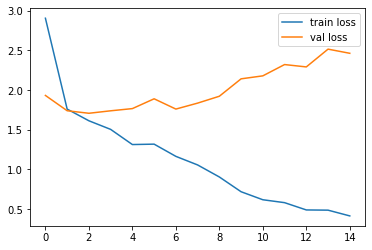

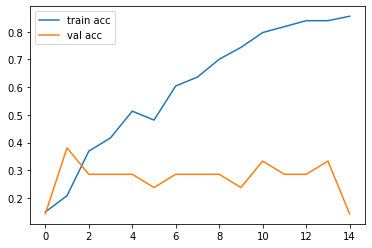

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Testing Pipeline

In [31]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('/content/drive/MyDrive/output_flower/train/images_of_lotus_flower_india/images of lotus flower india_14.jpeg', target_size=(224, 224))

In [32]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [33]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [34]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [35]:
# predict the probability across all output classes
yhat = model.predict(image)

In [36]:
yhat

array([[1.5066957e-16, 1.3038168e-09, 1.0307007e-15, 2.4372471e-07,
        9.9999976e-01, 0.0000000e+00]], dtype=float32)

In [37]:
result = np.where(yhat == np.amax(yhat))
r= result[1][0]
r

4

In [38]:
labels = sorted(os.listdir('/content/drive/MyDrive/output_flower/train'))


In [39]:
labels[r]

'lotus_images_in_water'

In [41]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

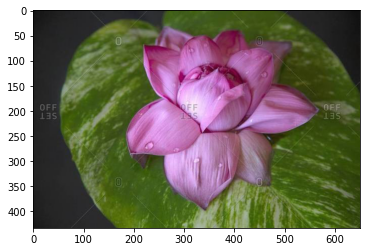

In [42]:
img = Image.open('/content/drive/MyDrive/output_flower/train/images_of_lotus_flower_india/images of lotus flower india_14.jpeg')
np_img = np.array(img)
imgplot = plt.imshow(np_img)
plt.show() 

# Testing